In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

electricity_data_to_load = "Resources/complete_dataset.csv"
electricity_data = pd.read_csv(electricity_data_to_load)
electricity_data.head(2)


,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.03,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.01,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N


In [2]:
electricity_data_df = electricity_data.rename(columns={"date":"Date", "demand":"Demand (MWh)", "RRP": "RRP (AUD/MWh)",
                                                       "min_temperature":"Min Temperature", "max_temperature":"Max temperature",
                                                       "solar_exposure":"Total Sunlight Energy (MJ/m^2)", "rainfall": "Rainfall (mm)",
                                                      "school_day":"School Day", "holiday":"Holiday"})
electricity_data_df.head(2)

,Date,Demand (MWh),RRP (AUD/MWh),demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,Min Temperature,Max temperature,Total Sunlight Energy (MJ/m^2),Rainfall (mm),School Day,Holiday
0,2015-01-01,99635.03,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.01,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N


In [3]:
electricity_data_clean = electricity_data_df.drop(electricity_data_df.columns[[3,4,5,6,7]],axis=1)

In [11]:
#Dropping rows with missing values
electricity_data_clean = electricity_data_clean.dropna()

In [5]:
electricity_data.head()

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N


In [55]:
#Removing rows with large price outliers
electricity_data_clean.sort_values("RRP (AUD/MWh)").tail(20)
electricity_data_clean = electricity_data_clean.loc[electricity_data_clean["RRP (AUD/MWh)"] <= 200, :]

,Date,Demand (MWh),RRP (AUD/MWh),Min Temperature,Max temperature,Total Sunlight Energy (MJ/m^2),Rainfall (mm),School Day,Holiday
1743,2019-10-10,123692.080,167.981136,10.2,14.7,12.6,0.2,Y,N
517,2016-06-01,141195.030,168.852759,4.8,17.0,8.2,0.0,Y,N
945,2017-08-03,151355.430,169.233827,3.1,9.0,4.4,0.0,Y,N
861,2017-05-11,128753.130,170.292645,6.1,16.5,8.6,0.0,Y,N
1477,2019-01-17,145211.490,175.352893,20.7,32.5,6.0,0.0,N,N
519,2016-06-03,137717.255,175.854630,6.8,14.1,8.5,0.0,Y,N
1481,2019-01-21,130517.970,176.689950,18.4,25.1,28.2,0.0,N,N
553,2016-07-07,138768.045,176.912036,10.5,13.7,4.1,3.8,N,N
1436,2018-12-07,156648.405,177.861817,25.1,38.0,27.1,0.0,Y,N
1476,2019-01-16,136971.755,178.079675,19.8,26.7,17.5,0.0,N,N


The P-value is: 2.0413552877954313e-30
The r-squared is: 0.061
The correlation coefficient is : 0.247


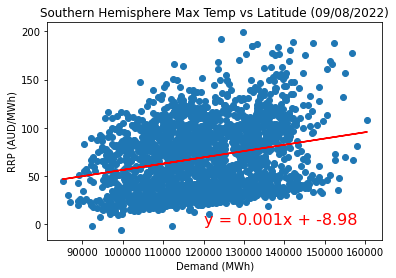

In [86]:
#Getting demand and price data to create scatterplot and check for correlation.
demand = electricity_data_clean["Demand (MWh)"]
price = electricity_data_clean["RRP (AUD/MWh)"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(demand, price)
regress_values = demand * slope + intercept
line_eq = (f'y = {round(slope,3)}x + {round(intercept,2)}')
plt.scatter(demand, price)
plt.plot(demand, regress_values,"red")
plt.annotate(line_eq,(120000,0), color="red",fontsize=16)
plt.title("Southern Hemisphere Max Temp vs Latitude (09/08/2022)")
plt.xlabel("Demand (MWh)")
plt.ylabel("RRP (AUD/MWh)")
print(f"The P-value is: {(pvalue)}")
print(f"The r-squared is: {round(rvalue**2,3)}")
print(f'The correlation coefficient is : {round(rvalue,3)}')



In [28]:
electricity_data_clean.count()

Date                              2102
Demand (MWh)                      2102
RRP (AUD/MWh)                     2102
Min Temperature                   2102
Max temperature                   2102
Total Sunlight Energy (MJ/m^2)    2102
Rainfall (mm)                     2102
School Day                        2102
Holiday                           2102
dtype: int64